# Training a neural network to classify MNIST digits

In this section, let us train a neural network to classify the MNIST dataset

Let us load the data. (Courtesy of [Michael Nielson](http://neuralnetworksanddeeplearning.com/))

In [27]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import mnist_loader

def sigmoid(z):
    return 1.0/(1+np.exp(-z))

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
print "Training set: {0}; Validation set: {1}; Test set: {2}".format(len(training_data), len(validation_data), len(test_data))

Training set: 50000; Validation set: 10000; Test set: 10000


Let us visualize a test data row.

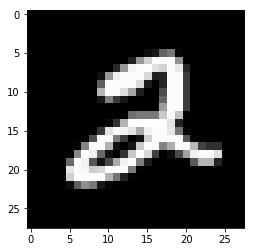

Label: [[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [28]:
idx = 5
t = training_data[idx][0].reshape((28, 28))
plt.imshow(t, cmap="gray")
plt.show()
print "Label: {0}".format(training_data[idx][1])

As can be seen, the input data is a vector of length 784 and label data is a vector of length 10. 

For example, a label of $[0,0,0,1,0,0,0,0,0,0]$ refers to number 3 since the 3rd index contains 1.

So, it makes sense to have 784 inputs in the first layer and 10 outputs in the output layer.

Let us initialize the neural network and see how it performs on the sample above.

In [29]:
w1 = np.random.randn(hidden_units,28*28)
w2 = np.random.randn(10,hidden_units)
b1 = np.random.randn(hidden_units,1)
b2 = np.random.randn(10,1)

x,y = training_data[idx]
a0 = x
z1 = np.dot(w1, a0) + b1
a1 = sigmoid(z1)
z2 = np.dot(w2, a1) + b2
a2 = sigmoid(z2)
        
print "Label: {0}; Obtained: {1}".format(np.argmax(y), np.argmax(a2))

Label: 2; Obtained: 1


Let us train the model. The code is similar to XOR.

We simply use stochastic gradient descent by constructing random mini batches from the training data without replacement. We quantify accurancy instead of error now by testing the model on a separate validation data.

In [30]:
hidden_units = 30
learning_rate = 3
epochs = 15
batch_size = 10

for epoch in range(epochs):
    random.shuffle(training_data)
    n = len(training_data)
    mini_batches = [training_data[k:k+batch_size] for k in xrange(0, n, batch_size)]
    
    for mini_batch in mini_batches:
        del_w1 = np.zeros(w1.shape)
        del_w2 = np.zeros(w2.shape)
        del_b1 = np.zeros(b1.shape)
        del_b2 = np.zeros(b2.shape)
        
        for x,y in mini_batch:
            a0 = x
            e = y
            z1 = np.dot(w1, a0) + b1
            a1 = sigmoid(z1)
            z2 = np.dot(w2, a1) + b2
            a2 = sigmoid(z2)
        
            d2 = (a2 - e) * a2 * (1-a2)
            del_b2 += d2
            del_w2 += np.dot(d2, a1.T) 
            d1 = np.dot(w2.T, d2) * a1 * (1-a1)
            del_b1 += d1
            del_w1 += np.dot(d1, a0.T)
            
        w1 -= (learning_rate * del_w1 / len(mini_batch))
        b1 -= (learning_rate * del_b1 / len(mini_batch))
        w2 -= (learning_rate * del_w2 / len(mini_batch))
        b2 -= (learning_rate * del_b2 / len(mini_batch))
    
    accurate = 0
    for x,y in validation_data:
        a0 = x
        e0 = y
        z1 = np.dot(w1, a0) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(w2, a1) + b2
        a2 = sigmoid(z2)
        
        result = np.argmax(a2)
        if result == e0:
            accurate += 1
    
    print "Epoch {0}: {1} / {2}".format(epoch+1, accurate, len(validation_data))

Epoch 1: 9147 / 10000
Epoch 2: 9291 / 10000
Epoch 3: 9386 / 10000
Epoch 4: 9397 / 10000
Epoch 5: 9435 / 10000
Epoch 6: 9450 / 10000
Epoch 7: 9440 / 10000
Epoch 8: 9468 / 10000
Epoch 9: 9487 / 10000
Epoch 10: 9495 / 10000
Epoch 11: 9501 / 10000
Epoch 12: 9528 / 10000
Epoch 13: 9512 / 10000
Epoch 14: 9512 / 10000
Epoch 15: 9502 / 10000


As we train, we can see that the accuracy improves on the validation data. Lets run the training case to be sure.

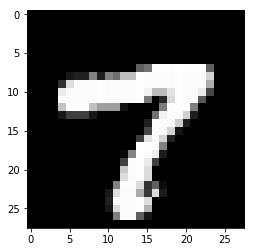

Label: 7; Obtained: 7


In [36]:
idx = 12341

t = training_data[idx][0].reshape((28, 28))
plt.imshow(t, cmap="gray")
plt.show()

x,y = training_data[idx]
a0 = x
z1 = np.dot(w1, a0) + b1
a1 = sigmoid(z1)
z2 = np.dot(w2, a1) + b2
a2 = sigmoid(z2)
        
print "Label: {0}; Obtained: {1}".format(np.argmax(y), np.argmax(a2))

Lets try on test data that the neural network has never seen before.

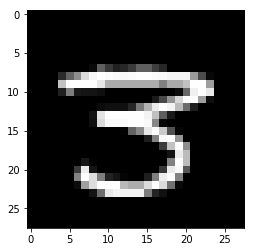

Label: 3; Obtained: 3


In [45]:
idx = 3456

t = test_data[idx][0].reshape((28, 28))
plt.imshow(t, cmap="gray")
plt.show()

x,y = test_data[idx]
a0 = x
z1 = np.dot(w1, a0) + b1
a1 = sigmoid(z1)
z2 = np.dot(w2, a1) + b2
a2 = sigmoid(z2)
        
print "Label: {0}; Obtained: {1}".format(y, np.argmax(a2))

Let us see where the prediction might be wrong

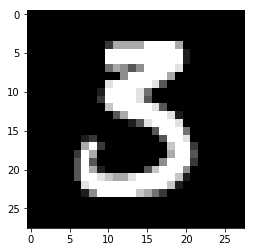

Label: 3; Obtained: 5


In [54]:
found = False
foundCount = 0
idx = -1
while not found:
    idx +=1
    
    x,y = test_data[idx]
    a0 = x
    z1 = np.dot(w1, a0) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)

    if y != np.argmax(a2):
        foundCount += 1
        if foundCount == 200:
            found = True

t = test_data[idx][0].reshape((28, 28))
plt.imshow(t, cmap="gray")
plt.show()

print "Label: {0}; Obtained: {1}".format(y, np.argmax(a2))

We can see the errors are usually on letters that can be misread by humans too.